In [1]:
from keras.datasets import boston_housing
from keras import layers
from keras import models
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [5]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',
                 loss='mse',
                 metrics=['mae'])
    return model

In [6]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [7]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=32)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
303/303 [==============================] - 0s 707us/step - loss: 502.6337 - mae: 20.5219
Epoch 2/100
303/303 [==============================] - 0s 68us/step - loss: 342.2669 - mae: 16.4047
Epoch 3/100
303/303 [==============================] - 0s 62us/step - loss: 201.0021 - mae: 11.9204
Epoch 4/100
303/303 [==============================] - 0s 66us/step - loss: 107.0156 - mae: 8.1309
Epoch 5/100
303/303 [==============================] - 0s 74us/step - loss: 60.8844 - mae: 5.9466
Epoch 6/100
303/303 [==============================] - 0s 63us/step - loss: 41.2985 - mae: 4.7759
Epoch 7/100
303/303 [==============================] - 0s 57us/step - loss: 31.0319 - mae: 4.0969
Epoch 8/100
303/303 [==============================] - 0s 75us/step - loss: 25.5559 - mae: 3.6680
Epoch 9/100
303/303 [==============================] - 0s 75us/step - loss: 22.3945 - mae: 3.3919
Epoch 10/100
303/303 [==============================] - 0s 60us/step - loss: 20.6396 - mae

303/303 [==============================] - 0s 68us/step - loss: 6.1536 - mae: 1.6984
Epoch 85/100
303/303 [==============================] - 0s 69us/step - loss: 5.9190 - mae: 1.6737
Epoch 86/100
303/303 [==============================] - 0s 74us/step - loss: 6.1281 - mae: 1.7156
Epoch 87/100
303/303 [==============================] - 0s 83us/step - loss: 5.6910 - mae: 1.6805
Epoch 88/100
303/303 [==============================] - 0s 71us/step - loss: 6.4002 - mae: 1.7810
Epoch 89/100
303/303 [==============================] - 0s 65us/step - loss: 5.6417 - mae: 1.6226
Epoch 90/100
303/303 [==============================] - 0s 71us/step - loss: 5.7880 - mae: 1.6495
Epoch 91/100
303/303 [==============================] - 0s 71us/step - loss: 6.0325 - mae: 1.7011
Epoch 92/100
303/303 [==============================] - 0s 69us/step - loss: 5.4811 - mae: 1.6202
Epoch 93/100
303/303 [==============================] - 0s 68us/step - loss: 5.6122 - mae: 1.6942
Epoch 94/100
303/303 [===========

303/303 [==============================] - 0s 71us/step - loss: 6.2943 - mae: 1.7856
Epoch 68/100
303/303 [==============================] - 0s 57us/step - loss: 6.1057 - mae: 1.7042
Epoch 69/100
303/303 [==============================] - 0s 59us/step - loss: 6.0157 - mae: 1.7267
Epoch 70/100
303/303 [==============================] - 0s 64us/step - loss: 6.5153 - mae: 1.8252
Epoch 71/100
303/303 [==============================] - 0s 67us/step - loss: 5.8704 - mae: 1.6666
Epoch 72/100
303/303 [==============================] - 0s 75us/step - loss: 6.1549 - mae: 1.7140
Epoch 73/100
303/303 [==============================] - 0s 88us/step - loss: 5.9747 - mae: 1.7207
Epoch 74/100
303/303 [==============================] - 0s 71us/step - loss: 5.9526 - mae: 1.6935
Epoch 75/100
303/303 [==============================] - 0s 66us/step - loss: 5.7437 - mae: 1.6799
Epoch 76/100
303/303 [==============================] - 0s 66us/step - loss: 5.7617 - mae: 1.7132
Epoch 77/100
303/303 [===========

303/303 [==============================] - 0s 68us/step - loss: 6.4449 - mae: 1.8515
Epoch 51/100
303/303 [==============================] - 0s 65us/step - loss: 6.2298 - mae: 1.8256
Epoch 52/100
303/303 [==============================] - 0s 72us/step - loss: 6.4975 - mae: 1.8639
Epoch 53/100
303/303 [==============================] - 0s 69us/step - loss: 6.2597 - mae: 1.8213
Epoch 54/100
303/303 [==============================] - 0s 59us/step - loss: 6.1422 - mae: 1.8056
Epoch 55/100
303/303 [==============================] - 0s 71us/step - loss: 6.2111 - mae: 1.8123
Epoch 56/100
303/303 [==============================] - 0s 64us/step - loss: 6.0182 - mae: 1.8278
Epoch 57/100
303/303 [==============================] - 0s 79us/step - loss: 6.1646 - mae: 1.7944
Epoch 58/100
303/303 [==============================] - 0s 78us/step - loss: 5.8041 - mae: 1.7757
Epoch 59/100
303/303 [==============================] - 0s 81us/step - loss: 5.8497 - mae: 1.7748
Epoch 60/100
303/303 [===========

303/303 [==============================] - 0s 62us/step - loss: 8.1824 - mae: 2.0239
Epoch 34/100
303/303 [==============================] - 0s 66us/step - loss: 8.0604 - mae: 1.9892
Epoch 35/100
303/303 [==============================] - 0s 60us/step - loss: 8.1487 - mae: 1.9723
Epoch 36/100
303/303 [==============================] - 0s 73us/step - loss: 7.9452 - mae: 1.9984
Epoch 37/100
303/303 [==============================] - 0s 72us/step - loss: 7.7053 - mae: 1.8995
Epoch 38/100
303/303 [==============================] - 0s 67us/step - loss: 7.8381 - mae: 1.9741
Epoch 39/100
303/303 [==============================] - 0s 83us/step - loss: 7.9267 - mae: 1.9535
Epoch 40/100
303/303 [==============================] - 0s 72us/step - loss: 7.5140 - mae: 1.9355
Epoch 41/100
303/303 [==============================] - 0s 71us/step - loss: 7.4443 - mae: 1.9662
Epoch 42/100
303/303 [==============================] - 0s 77us/step - loss: 7.3883 - mae: 1.8929
Epoch 43/100
303/303 [===========

In [8]:
all_scores
np.mean(all_scores)

2.3044464588165283

In [9]:
num_epochs = 500 
all_mae_history = []

for i in range(k): 
    print('processing fold #', i) 
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data,
              partial_train_targets,
              validation_data = (val_data, val_targets),
              epochs=num_epochs,
              batch_size=32)

    mae_history = history.history['val_mae']
    all_mae_history.append(mae_history)

processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 0s 340us/step - loss: 522.1724 - mae: 21.0094 - val_loss: 418.3359 - val_mae: 18.2049
Epoch 2/500
303/303 [==============================] - 0s 79us/step - loss: 376.5431 - mae: 17.3929 - val_loss: 276.7989 - val_mae: 14.2993
Epoch 3/500
303/303 [==============================] - 0s 67us/step - loss: 244.1493 - mae: 13.4796 - val_loss: 157.0917 - val_mae: 10.2781
Epoch 4/500
303/303 [==============================] - 0s 83us/step - loss: 139.7288 - mae: 9.6121 - val_loss: 78.4532 - val_mae: 6.7692
Epoch 5/500
303/303 [==============================] - 0s 91us/step - loss: 78.0915 - mae: 6.8083 - val_loss: 46.5304 - val_mae: 5.0074
Epoch 6/500
303/303 [==============================] - 0s 88us/step - loss: 51.0812 - mae: 5.4369 - val_loss: 33.8715 - val_mae: 4.1064
Epoch 7/500
303/303 [==============================] - 0s 88us/step - loss: 36.9634 - mae: 4.5650 - val_

Epoch 61/500
303/303 [==============================] - 0s 75us/step - loss: 7.6392 - mae: 1.9676 - val_loss: 7.6011 - val_mae: 2.1042
Epoch 62/500
303/303 [==============================] - 0s 86us/step - loss: 7.0834 - mae: 1.9095 - val_loss: 7.7994 - val_mae: 2.0584
Epoch 63/500
303/303 [==============================] - 0s 91us/step - loss: 7.4716 - mae: 1.9091 - val_loss: 7.3343 - val_mae: 2.0327
Epoch 64/500
303/303 [==============================] - 0s 88us/step - loss: 6.8440 - mae: 1.8374 - val_loss: 7.5047 - val_mae: 2.1189
Epoch 65/500
303/303 [==============================] - 0s 88us/step - loss: 6.8550 - mae: 1.8293 - val_loss: 7.7261 - val_mae: 2.1361
Epoch 66/500
303/303 [==============================] - 0s 86us/step - loss: 7.1280 - mae: 1.9065 - val_loss: 8.2766 - val_mae: 2.0404
Epoch 67/500
303/303 [==============================] - 0s 91us/step - loss: 6.5145 - mae: 1.7498 - val_loss: 8.7827 - val_mae: 2.3608
Epoch 68/500
303/303 [==============================] -

303/303 [==============================] - 0s 96us/step - loss: 4.4314 - mae: 1.5018 - val_loss: 7.9546 - val_mae: 2.0300
Epoch 122/500
303/303 [==============================] - 0s 86us/step - loss: 4.5002 - mae: 1.5387 - val_loss: 8.3878 - val_mae: 2.0788
Epoch 123/500
303/303 [==============================] - 0s 91us/step - loss: 4.2533 - mae: 1.4532 - val_loss: 8.3593 - val_mae: 2.3120
Epoch 124/500
303/303 [==============================] - 0s 92us/step - loss: 4.8589 - mae: 1.5807 - val_loss: 8.1043 - val_mae: 2.0632
Epoch 125/500
303/303 [==============================] - 0s 99us/step - loss: 4.6392 - mae: 1.5170 - val_loss: 7.4670 - val_mae: 2.0996
Epoch 126/500
303/303 [==============================] - 0s 94us/step - loss: 4.5566 - mae: 1.4949 - val_loss: 7.3652 - val_mae: 1.9759
Epoch 127/500
303/303 [==============================] - 0s 98us/step - loss: 4.0794 - mae: 1.4533 - val_loss: 7.9743 - val_mae: 2.0938
Epoch 128/500
303/303 [==============================] - 0s 10

303/303 [==============================] - 0s 74us/step - loss: 3.1358 - mae: 1.2602 - val_loss: 8.4342 - val_mae: 2.2167
Epoch 182/500
303/303 [==============================] - 0s 70us/step - loss: 3.2237 - mae: 1.3100 - val_loss: 9.7348 - val_mae: 2.4640
Epoch 183/500
303/303 [==============================] - 0s 90us/step - loss: 3.0957 - mae: 1.2722 - val_loss: 9.7482 - val_mae: 2.2979
Epoch 184/500
303/303 [==============================] - 0s 107us/step - loss: 3.2727 - mae: 1.2962 - val_loss: 8.6982 - val_mae: 2.3067
Epoch 185/500
303/303 [==============================] - 0s 93us/step - loss: 2.8203 - mae: 1.2004 - val_loss: 9.4254 - val_mae: 2.4010
Epoch 186/500
303/303 [==============================] - 0s 82us/step - loss: 3.1075 - mae: 1.2944 - val_loss: 11.2158 - val_mae: 2.5789
Epoch 187/500
303/303 [==============================] - 0s 80us/step - loss: 3.1625 - mae: 1.2671 - val_loss: 8.9072 - val_mae: 2.2125
Epoch 188/500
303/303 [==============================] - 0s 

Epoch 241/500
303/303 [==============================] - 0s 81us/step - loss: 2.1484 - mae: 1.0754 - val_loss: 8.6054 - val_mae: 2.1807
Epoch 242/500
303/303 [==============================] - 0s 86us/step - loss: 2.3511 - mae: 1.1207 - val_loss: 8.7688 - val_mae: 2.1653
Epoch 243/500
303/303 [==============================] - 0s 99us/step - loss: 2.3606 - mae: 1.1190 - val_loss: 8.1412 - val_mae: 2.0470
Epoch 244/500
303/303 [==============================] - 0s 94us/step - loss: 2.1703 - mae: 1.0653 - val_loss: 9.2640 - val_mae: 2.1471
Epoch 245/500
303/303 [==============================] - 0s 76us/step - loss: 2.3854 - mae: 1.1355 - val_loss: 8.4821 - val_mae: 2.1004
Epoch 246/500
303/303 [==============================] - 0s 96us/step - loss: 2.1515 - mae: 1.0809 - val_loss: 8.5982 - val_mae: 2.0570
Epoch 247/500
303/303 [==============================] - 0s 84us/step - loss: 2.4194 - mae: 1.1619 - val_loss: 8.9389 - val_mae: 2.1933
Epoch 248/500
303/303 [=========================

303/303 [==============================] - 0s 82us/step - loss: 1.7838 - mae: 0.9456 - val_loss: 9.5799 - val_mae: 2.3139
Epoch 302/500
303/303 [==============================] - 0s 113us/step - loss: 1.7549 - mae: 1.0077 - val_loss: 8.4083 - val_mae: 2.1336
Epoch 303/500
303/303 [==============================] - 0s 94us/step - loss: 1.7313 - mae: 0.9604 - val_loss: 8.2131 - val_mae: 2.0129
Epoch 304/500
303/303 [==============================] - 0s 84us/step - loss: 1.6386 - mae: 0.8989 - val_loss: 8.3952 - val_mae: 2.0683
Epoch 305/500
303/303 [==============================] - 0s 89us/step - loss: 1.8245 - mae: 1.0042 - val_loss: 10.4145 - val_mae: 2.5062
Epoch 306/500
303/303 [==============================] - 0s 96us/step - loss: 2.1728 - mae: 1.1210 - val_loss: 9.1381 - val_mae: 2.1145
Epoch 307/500
303/303 [==============================] - 0s 94us/step - loss: 1.6809 - mae: 0.9384 - val_loss: 11.2205 - val_mae: 2.4225
Epoch 308/500
303/303 [==============================] - 0s

303/303 [==============================] - 0s 77us/step - loss: 1.4522 - mae: 0.8824 - val_loss: 9.3619 - val_mae: 2.2546
Epoch 362/500
303/303 [==============================] - 0s 67us/step - loss: 1.4479 - mae: 0.9034 - val_loss: 9.3072 - val_mae: 2.1227
Epoch 363/500
303/303 [==============================] - 0s 76us/step - loss: 1.4786 - mae: 0.8841 - val_loss: 9.3559 - val_mae: 2.2119
Epoch 364/500
303/303 [==============================] - 0s 84us/step - loss: 1.5480 - mae: 0.9274 - val_loss: 9.1827 - val_mae: 2.1068
Epoch 365/500
303/303 [==============================] - 0s 83us/step - loss: 1.4996 - mae: 0.9173 - val_loss: 9.0682 - val_mae: 2.0680
Epoch 366/500
303/303 [==============================] - 0s 94us/step - loss: 1.2970 - mae: 0.8497 - val_loss: 9.4264 - val_mae: 2.2147
Epoch 367/500
303/303 [==============================] - 0s 89us/step - loss: 1.6658 - mae: 0.9900 - val_loss: 8.9563 - val_mae: 2.0807
Epoch 368/500
303/303 [==============================] - 0s 88

303/303 [==============================] - 0s 69us/step - loss: 1.0450 - mae: 0.7592 - val_loss: 9.6328 - val_mae: 2.2074
Epoch 422/500
303/303 [==============================] - 0s 79us/step - loss: 1.4520 - mae: 0.9006 - val_loss: 8.9048 - val_mae: 2.0210
Epoch 423/500
303/303 [==============================] - 0s 89us/step - loss: 1.2352 - mae: 0.8307 - val_loss: 9.3706 - val_mae: 2.0615
Epoch 424/500
303/303 [==============================] - 0s 100us/step - loss: 1.0045 - mae: 0.7347 - val_loss: 9.1188 - val_mae: 2.0172
Epoch 425/500
303/303 [==============================] - 0s 86us/step - loss: 1.3715 - mae: 0.8795 - val_loss: 9.7776 - val_mae: 2.2500
Epoch 426/500
303/303 [==============================] - 0s 86us/step - loss: 1.0632 - mae: 0.7523 - val_loss: 9.3133 - val_mae: 2.0869
Epoch 427/500
303/303 [==============================] - 0s 80us/step - loss: 1.3000 - mae: 0.8651 - val_loss: 9.4277 - val_mae: 2.1362
Epoch 428/500
303/303 [==============================] - 0s 8

303/303 [==============================] - 0s 92us/step - loss: 1.4680 - mae: 0.8711 - val_loss: 9.9613 - val_mae: 2.3019
Epoch 482/500
303/303 [==============================] - 0s 91us/step - loss: 1.0146 - mae: 0.7342 - val_loss: 8.9087 - val_mae: 2.0356
Epoch 483/500
303/303 [==============================] - 0s 84us/step - loss: 0.8607 - mae: 0.6601 - val_loss: 8.9239 - val_mae: 2.0992
Epoch 484/500
303/303 [==============================] - 0s 84us/step - loss: 1.3400 - mae: 0.8623 - val_loss: 12.0045 - val_mae: 2.5329
Epoch 485/500
303/303 [==============================] - 0s 90us/step - loss: 1.0471 - mae: 0.7523 - val_loss: 9.2906 - val_mae: 2.0560
Epoch 486/500
303/303 [==============================] - 0s 80us/step - loss: 1.1565 - mae: 0.7870 - val_loss: 9.1431 - val_mae: 2.0819
Epoch 487/500
303/303 [==============================] - 0s 74us/step - loss: 0.8689 - mae: 0.6355 - val_loss: 10.2205 - val_mae: 2.1314
Epoch 488/500
303/303 [==============================] - 0s 

303/303 [==============================] - 0s 83us/step - loss: 8.1636 - mae: 1.9443 - val_loss: 14.8149 - val_mae: 3.0590
Epoch 41/500
303/303 [==============================] - 0s 87us/step - loss: 8.4136 - mae: 2.0571 - val_loss: 10.2669 - val_mae: 2.4484
Epoch 42/500
303/303 [==============================] - 0s 100us/step - loss: 8.1039 - mae: 1.9560 - val_loss: 10.9088 - val_mae: 2.5414
Epoch 43/500
303/303 [==============================] - 0s 100us/step - loss: 8.0076 - mae: 1.9509 - val_loss: 10.6388 - val_mae: 2.4921
Epoch 44/500
303/303 [==============================] - 0s 77us/step - loss: 8.2169 - mae: 1.9835 - val_loss: 10.2486 - val_mae: 2.4426
Epoch 45/500
303/303 [==============================] - 0s 85us/step - loss: 8.1865 - mae: 1.9619 - val_loss: 10.0707 - val_mae: 2.4411
Epoch 46/500
303/303 [==============================] - 0s 92us/step - loss: 7.8356 - mae: 1.9435 - val_loss: 11.9761 - val_mae: 2.6962
Epoch 47/500
303/303 [==============================] - 0s 

303/303 [==============================] - 0s 79us/step - loss: 5.1092 - mae: 1.5714 - val_loss: 10.1881 - val_mae: 2.4472
Epoch 101/500
303/303 [==============================] - 0s 88us/step - loss: 5.3597 - mae: 1.6024 - val_loss: 8.8622 - val_mae: 2.2390
Epoch 102/500
303/303 [==============================] - 0s 78us/step - loss: 4.8816 - mae: 1.5544 - val_loss: 11.2241 - val_mae: 2.5694
Epoch 103/500
303/303 [==============================] - 0s 82us/step - loss: 5.1298 - mae: 1.6008 - val_loss: 9.2468 - val_mae: 2.2982
Epoch 104/500
303/303 [==============================] - 0s 78us/step - loss: 4.7915 - mae: 1.5120 - val_loss: 11.1199 - val_mae: 2.5163
Epoch 105/500
303/303 [==============================] - 0s 92us/step - loss: 4.9230 - mae: 1.5193 - val_loss: 13.9007 - val_mae: 2.8481
Epoch 106/500
303/303 [==============================] - 0s 91us/step - loss: 4.9673 - mae: 1.5838 - val_loss: 10.4135 - val_mae: 2.4134
Epoch 107/500
303/303 [==============================] - 

303/303 [==============================] - 0s 84us/step - loss: 3.1074 - mae: 1.2378 - val_loss: 12.8059 - val_mae: 2.7204
Epoch 161/500
303/303 [==============================] - 0s 69us/step - loss: 3.3190 - mae: 1.3291 - val_loss: 12.0289 - val_mae: 2.5931
Epoch 162/500
303/303 [==============================] - 0s 82us/step - loss: 3.3833 - mae: 1.2858 - val_loss: 10.1455 - val_mae: 2.3887
Epoch 163/500
303/303 [==============================] - 0s 95us/step - loss: 2.9952 - mae: 1.2112 - val_loss: 9.9740 - val_mae: 2.3258
Epoch 164/500
303/303 [==============================] - 0s 88us/step - loss: 3.5541 - mae: 1.3199 - val_loss: 10.3748 - val_mae: 2.3869
Epoch 165/500
303/303 [==============================] - 0s 81us/step - loss: 3.2128 - mae: 1.2832 - val_loss: 9.3225 - val_mae: 2.3126
Epoch 166/500
303/303 [==============================] - 0s 81us/step - loss: 3.0165 - mae: 1.2607 - val_loss: 13.3922 - val_mae: 2.6437
Epoch 167/500
303/303 [==============================] - 

Epoch 220/500
303/303 [==============================] - 0s 81us/step - loss: 2.7152 - mae: 1.1596 - val_loss: 11.7467 - val_mae: 2.4411
Epoch 221/500
303/303 [==============================] - 0s 77us/step - loss: 2.2253 - mae: 1.0550 - val_loss: 12.6381 - val_mae: 2.5350
Epoch 222/500
303/303 [==============================] - 0s 101us/step - loss: 2.1591 - mae: 1.0607 - val_loss: 17.2788 - val_mae: 2.9829
Epoch 223/500
303/303 [==============================] - 0s 94us/step - loss: 2.4523 - mae: 1.1601 - val_loss: 10.4289 - val_mae: 2.3134
Epoch 224/500
303/303 [==============================] - 0s 84us/step - loss: 2.3700 - mae: 1.1306 - val_loss: 12.5056 - val_mae: 2.5499
Epoch 225/500
303/303 [==============================] - 0s 93us/step - loss: 2.1889 - mae: 1.0648 - val_loss: 11.8534 - val_mae: 2.4429
Epoch 226/500
303/303 [==============================] - 0s 80us/step - loss: 2.3912 - mae: 1.1529 - val_loss: 11.8710 - val_mae: 2.4526
Epoch 227/500
303/303 [=================

Epoch 280/500
303/303 [==============================] - 0s 77us/step - loss: 1.5652 - mae: 0.9343 - val_loss: 12.3216 - val_mae: 2.4933
Epoch 281/500
303/303 [==============================] - 0s 83us/step - loss: 1.7927 - mae: 1.0057 - val_loss: 14.9367 - val_mae: 2.7197
Epoch 282/500
303/303 [==============================] - 0s 88us/step - loss: 1.7169 - mae: 0.9309 - val_loss: 10.7714 - val_mae: 2.3832
Epoch 283/500
303/303 [==============================] - 0s 95us/step - loss: 1.6282 - mae: 0.9199 - val_loss: 12.5690 - val_mae: 2.5139
Epoch 284/500
303/303 [==============================] - 0s 94us/step - loss: 2.2574 - mae: 1.1081 - val_loss: 12.3692 - val_mae: 2.4686
Epoch 285/500
303/303 [==============================] - 0s 80us/step - loss: 1.3954 - mae: 0.8429 - val_loss: 13.7607 - val_mae: 2.6468
Epoch 286/500
303/303 [==============================] - 0s 92us/step - loss: 1.7804 - mae: 0.9654 - val_loss: 14.9177 - val_mae: 2.7706
Epoch 287/500
303/303 [==================

Epoch 340/500
303/303 [==============================] - 0s 74us/step - loss: 1.1061 - mae: 0.7849 - val_loss: 13.6693 - val_mae: 2.5771
Epoch 341/500
303/303 [==============================] - 0s 92us/step - loss: 1.3984 - mae: 0.8818 - val_loss: 13.5761 - val_mae: 2.6144
Epoch 342/500
303/303 [==============================] - 0s 100us/step - loss: 1.5713 - mae: 0.9289 - val_loss: 12.3976 - val_mae: 2.4732
Epoch 343/500
303/303 [==============================] - 0s 72us/step - loss: 1.2019 - mae: 0.8348 - val_loss: 13.2820 - val_mae: 2.5492
Epoch 344/500
303/303 [==============================] - 0s 81us/step - loss: 1.2498 - mae: 0.8157 - val_loss: 16.7174 - val_mae: 2.8982
Epoch 345/500
303/303 [==============================] - 0s 79us/step - loss: 1.5155 - mae: 0.9457 - val_loss: 13.2748 - val_mae: 2.6058
Epoch 346/500
303/303 [==============================] - 0s 89us/step - loss: 1.3744 - mae: 0.8621 - val_loss: 12.0337 - val_mae: 2.3829
Epoch 347/500
303/303 [=================

Epoch 400/500
303/303 [==============================] - 0s 83us/step - loss: 1.0152 - mae: 0.7662 - val_loss: 14.2548 - val_mae: 2.5616
Epoch 401/500
303/303 [==============================] - 0s 96us/step - loss: 0.8720 - mae: 0.6964 - val_loss: 14.4765 - val_mae: 2.6615
Epoch 402/500
303/303 [==============================] - 0s 83us/step - loss: 1.2111 - mae: 0.7955 - val_loss: 13.3420 - val_mae: 2.5442
Epoch 403/500
303/303 [==============================] - 0s 95us/step - loss: 0.9992 - mae: 0.7595 - val_loss: 16.5556 - val_mae: 2.8129
Epoch 404/500
303/303 [==============================] - 0s 81us/step - loss: 1.1474 - mae: 0.8040 - val_loss: 13.0503 - val_mae: 2.5107
Epoch 405/500
303/303 [==============================] - 0s 88us/step - loss: 1.0082 - mae: 0.7068 - val_loss: 14.1520 - val_mae: 2.5805
Epoch 406/500
303/303 [==============================] - 0s 72us/step - loss: 0.8302 - mae: 0.6878 - val_loss: 12.9072 - val_mae: 2.4807
Epoch 407/500
303/303 [==================

Epoch 460/500
303/303 [==============================] - 0s 86us/step - loss: 1.2578 - mae: 0.8912 - val_loss: 14.5172 - val_mae: 2.6291
Epoch 461/500
303/303 [==============================] - 0s 77us/step - loss: 0.7289 - mae: 0.6141 - val_loss: 16.5680 - val_mae: 2.8379
Epoch 462/500
303/303 [==============================] - 0s 91us/step - loss: 0.8490 - mae: 0.6495 - val_loss: 15.7158 - val_mae: 2.7426
Epoch 463/500
303/303 [==============================] - 0s 86us/step - loss: 0.8270 - mae: 0.6688 - val_loss: 19.6286 - val_mae: 3.1367
Epoch 464/500
303/303 [==============================] - 0s 91us/step - loss: 1.2045 - mae: 0.8036 - val_loss: 13.8138 - val_mae: 2.5189
Epoch 465/500
303/303 [==============================] - 0s 86us/step - loss: 0.7618 - mae: 0.6177 - val_loss: 12.9541 - val_mae: 2.6062
Epoch 466/500
303/303 [==============================] - 0s 92us/step - loss: 1.1196 - mae: 0.7987 - val_loss: 14.5208 - val_mae: 2.6108
Epoch 467/500
303/303 [==================

303/303 [==============================] - 0s 85us/step - loss: 10.8411 - mae: 2.3799 - val_loss: 16.7266 - val_mae: 2.5609
Epoch 20/500
303/303 [==============================] - 0s 73us/step - loss: 10.6338 - mae: 2.3514 - val_loss: 15.9410 - val_mae: 2.6758
Epoch 21/500
303/303 [==============================] - 0s 85us/step - loss: 10.3169 - mae: 2.3322 - val_loss: 15.5905 - val_mae: 2.6377
Epoch 22/500
303/303 [==============================] - 0s 81us/step - loss: 9.9098 - mae: 2.2700 - val_loss: 15.5012 - val_mae: 2.5987
Epoch 23/500
303/303 [==============================] - 0s 106us/step - loss: 9.7328 - mae: 2.2620 - val_loss: 16.0665 - val_mae: 2.5917
Epoch 24/500
303/303 [==============================] - 0s 95us/step - loss: 9.6521 - mae: 2.1985 - val_loss: 16.1168 - val_mae: 2.6816
Epoch 25/500
303/303 [==============================] - 0s 98us/step - loss: 9.0274 - mae: 2.2035 - val_loss: 15.8049 - val_mae: 2.7442
Epoch 26/500
303/303 [==============================] - 0

303/303 [==============================] - 0s 72us/step - loss: 4.7392 - mae: 1.6015 - val_loss: 14.5339 - val_mae: 2.4408
Epoch 80/500
303/303 [==============================] - 0s 74us/step - loss: 4.7282 - mae: 1.6086 - val_loss: 14.0861 - val_mae: 2.5757
Epoch 81/500
303/303 [==============================] - 0s 81us/step - loss: 4.4370 - mae: 1.5633 - val_loss: 13.6416 - val_mae: 2.4442
Epoch 82/500
303/303 [==============================] - 0s 75us/step - loss: 4.7792 - mae: 1.6216 - val_loss: 16.2483 - val_mae: 2.9651
Epoch 83/500
303/303 [==============================] - 0s 77us/step - loss: 4.8095 - mae: 1.6316 - val_loss: 13.8942 - val_mae: 2.4261
Epoch 84/500
303/303 [==============================] - 0s 77us/step - loss: 4.2451 - mae: 1.4917 - val_loss: 14.5052 - val_mae: 2.6453
Epoch 85/500
303/303 [==============================] - 0s 104us/step - loss: 4.5186 - mae: 1.5933 - val_loss: 14.4021 - val_mae: 2.4609
Epoch 86/500
303/303 [==============================] - 0s 9

303/303 [==============================] - 0s 75us/step - loss: 3.1121 - mae: 1.2913 - val_loss: 13.0187 - val_mae: 2.4823
Epoch 140/500
303/303 [==============================] - 0s 77us/step - loss: 2.9555 - mae: 1.2625 - val_loss: 13.3081 - val_mae: 2.3943
Epoch 141/500
303/303 [==============================] - 0s 80us/step - loss: 2.9340 - mae: 1.2766 - val_loss: 13.0452 - val_mae: 2.4027
Epoch 142/500
303/303 [==============================] - 0s 84us/step - loss: 3.1924 - mae: 1.3341 - val_loss: 13.9789 - val_mae: 2.5774
Epoch 143/500
303/303 [==============================] - 0s 95us/step - loss: 2.9160 - mae: 1.2530 - val_loss: 15.0035 - val_mae: 2.7348
Epoch 144/500
303/303 [==============================] - 0s 82us/step - loss: 3.1027 - mae: 1.2973 - val_loss: 14.0284 - val_mae: 2.5020
Epoch 145/500
303/303 [==============================] - 0s 78us/step - loss: 2.9760 - mae: 1.2832 - val_loss: 13.5457 - val_mae: 2.5756
Epoch 146/500
303/303 [==============================] 

Epoch 199/500
303/303 [==============================] - 0s 86us/step - loss: 2.2322 - mae: 1.1288 - val_loss: 12.8451 - val_mae: 2.4227
Epoch 200/500
303/303 [==============================] - 0s 88us/step - loss: 2.1737 - mae: 1.1288 - val_loss: 12.9138 - val_mae: 2.4191
Epoch 201/500
303/303 [==============================] - 0s 92us/step - loss: 1.9187 - mae: 1.0238 - val_loss: 13.6304 - val_mae: 2.5236
Epoch 202/500
303/303 [==============================] - 0s 102us/step - loss: 1.9502 - mae: 1.0373 - val_loss: 13.6831 - val_mae: 2.5597
Epoch 203/500
303/303 [==============================] - 0s 83us/step - loss: 1.8099 - mae: 1.0101 - val_loss: 14.1953 - val_mae: 2.7023
Epoch 204/500
303/303 [==============================] - 0s 84us/step - loss: 2.0539 - mae: 1.0920 - val_loss: 13.1692 - val_mae: 2.5061
Epoch 205/500
303/303 [==============================] - 0s 78us/step - loss: 2.0280 - mae: 1.1002 - val_loss: 12.6219 - val_mae: 2.4204
Epoch 206/500
303/303 [=================

Epoch 259/500
303/303 [==============================] - 0s 85us/step - loss: 1.3708 - mae: 0.8449 - val_loss: 13.2019 - val_mae: 2.5155
Epoch 260/500
303/303 [==============================] - 0s 90us/step - loss: 1.5850 - mae: 0.9419 - val_loss: 14.0260 - val_mae: 2.7042
Epoch 261/500
303/303 [==============================] - 0s 86us/step - loss: 1.6967 - mae: 1.0088 - val_loss: 13.2236 - val_mae: 2.5392
Epoch 262/500
303/303 [==============================] - 0s 90us/step - loss: 1.5363 - mae: 0.9168 - val_loss: 13.0113 - val_mae: 2.4754
Epoch 263/500
303/303 [==============================] - 0s 78us/step - loss: 1.7595 - mae: 0.9848 - val_loss: 12.5188 - val_mae: 2.4207
Epoch 264/500
303/303 [==============================] - 0s 108us/step - loss: 1.4363 - mae: 0.8628 - val_loss: 12.1026 - val_mae: 2.4450
Epoch 265/500
303/303 [==============================] - 0s 75us/step - loss: 1.7136 - mae: 1.0215 - val_loss: 12.8852 - val_mae: 2.4593
Epoch 266/500
303/303 [=================

Epoch 319/500
303/303 [==============================] - 0s 77us/step - loss: 1.1457 - mae: 0.7992 - val_loss: 13.1244 - val_mae: 2.5514
Epoch 320/500
303/303 [==============================] - 0s 88us/step - loss: 1.2313 - mae: 0.8185 - val_loss: 12.2838 - val_mae: 2.4974
Epoch 321/500
303/303 [==============================] - 0s 90us/step - loss: 1.3243 - mae: 0.8727 - val_loss: 12.9040 - val_mae: 2.5269
Epoch 322/500
303/303 [==============================] - 0s 94us/step - loss: 1.5679 - mae: 0.9509 - val_loss: 12.7826 - val_mae: 2.4774
Epoch 323/500
303/303 [==============================] - 0s 99us/step - loss: 1.0872 - mae: 0.7749 - val_loss: 13.1306 - val_mae: 2.5000
Epoch 324/500
303/303 [==============================] - 0s 80us/step - loss: 1.3977 - mae: 0.8844 - val_loss: 13.3456 - val_mae: 2.5666
Epoch 325/500
303/303 [==============================] - 0s 91us/step - loss: 0.9286 - mae: 0.6909 - val_loss: 13.7314 - val_mae: 2.7477
Epoch 326/500
303/303 [==================

Epoch 379/500
303/303 [==============================] - 0s 85us/step - loss: 0.8398 - mae: 0.6669 - val_loss: 12.7406 - val_mae: 2.5073
Epoch 380/500
303/303 [==============================] - 0s 85us/step - loss: 1.3839 - mae: 0.8478 - val_loss: 12.3167 - val_mae: 2.4660
Epoch 381/500
303/303 [==============================] - 0s 99us/step - loss: 0.9456 - mae: 0.7227 - val_loss: 13.1318 - val_mae: 2.5871
Epoch 382/500
303/303 [==============================] - 0s 89us/step - loss: 0.8369 - mae: 0.6817 - val_loss: 13.2355 - val_mae: 2.5450
Epoch 383/500
303/303 [==============================] - 0s 79us/step - loss: 1.0699 - mae: 0.7959 - val_loss: 12.8614 - val_mae: 2.5695
Epoch 384/500
303/303 [==============================] - 0s 81us/step - loss: 1.0131 - mae: 0.7824 - val_loss: 13.3814 - val_mae: 2.6162
Epoch 385/500
303/303 [==============================] - 0s 80us/step - loss: 1.1852 - mae: 0.8401 - val_loss: 12.3511 - val_mae: 2.5139
Epoch 386/500
303/303 [==================

Epoch 439/500
303/303 [==============================] - 0s 65us/step - loss: 0.9940 - mae: 0.7479 - val_loss: 12.6676 - val_mae: 2.5657
Epoch 440/500
303/303 [==============================] - 0s 78us/step - loss: 1.0116 - mae: 0.7120 - val_loss: 12.8378 - val_mae: 2.5860
Epoch 441/500
303/303 [==============================] - 0s 82us/step - loss: 1.2449 - mae: 0.8172 - val_loss: 12.4389 - val_mae: 2.5217
Epoch 442/500
303/303 [==============================] - 0s 82us/step - loss: 0.7999 - mae: 0.6288 - val_loss: 12.7212 - val_mae: 2.5468
Epoch 443/500
303/303 [==============================] - 0s 76us/step - loss: 0.6385 - mae: 0.6005 - val_loss: 13.1896 - val_mae: 2.6369
Epoch 444/500
303/303 [==============================] - 0s 90us/step - loss: 0.9118 - mae: 0.7128 - val_loss: 14.3034 - val_mae: 2.7923
Epoch 445/500
303/303 [==============================] - 0s 92us/step - loss: 0.9116 - mae: 0.7209 - val_loss: 12.8579 - val_mae: 2.5808
Epoch 446/500
303/303 [==================

Epoch 499/500
303/303 [==============================] - 0s 93us/step - loss: 0.7028 - mae: 0.6118 - val_loss: 13.4521 - val_mae: 2.6240
Epoch 500/500
303/303 [==============================] - 0s 75us/step - loss: 0.8745 - mae: 0.7015 - val_loss: 12.9508 - val_mae: 2.5868
processing fold # 3
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 0s 326us/step - loss: 501.0631 - mae: 20.5278 - val_loss: 547.5983 - val_mae: 21.2731
Epoch 2/500
303/303 [==============================] - 0s 75us/step - loss: 379.0866 - mae: 17.3951 - val_loss: 408.1475 - val_mae: 17.9697
Epoch 3/500
303/303 [==============================] - 0s 85us/step - loss: 260.7409 - mae: 14.0227 - val_loss: 266.9579 - val_mae: 14.0487
Epoch 4/500
303/303 [==============================] - 0s 91us/step - loss: 158.2257 - mae: 10.4655 - val_loss: 162.3720 - val_mae: 10.2076
Epoch 5/500
303/303 [==============================] - 0s 84us/step - loss: 89.0704 - mae: 7.5079 -

303/303 [==============================] - 0s 83us/step - loss: 6.5962 - mae: 1.7517 - val_loss: 11.3513 - val_mae: 2.4045
Epoch 59/500
303/303 [==============================] - 0s 77us/step - loss: 6.2799 - mae: 1.7088 - val_loss: 12.2125 - val_mae: 2.5485
Epoch 60/500
303/303 [==============================] - 0s 81us/step - loss: 6.2900 - mae: 1.7455 - val_loss: 11.7874 - val_mae: 2.5135
Epoch 61/500
303/303 [==============================] - 0s 87us/step - loss: 6.1465 - mae: 1.7054 - val_loss: 10.8007 - val_mae: 2.3431
Epoch 62/500
303/303 [==============================] - 0s 84us/step - loss: 6.1881 - mae: 1.7249 - val_loss: 12.0733 - val_mae: 2.4782
Epoch 63/500
303/303 [==============================] - 0s 92us/step - loss: 5.9970 - mae: 1.7142 - val_loss: 11.6112 - val_mae: 2.4766
Epoch 64/500
303/303 [==============================] - 0s 90us/step - loss: 5.9811 - mae: 1.6745 - val_loss: 11.7464 - val_mae: 2.4262
Epoch 65/500
303/303 [==============================] - 0s 95

303/303 [==============================] - 0s 96us/step - loss: 4.0938 - mae: 1.3861 - val_loss: 11.3984 - val_mae: 2.4013
Epoch 119/500
303/303 [==============================] - 0s 86us/step - loss: 3.9324 - mae: 1.3630 - val_loss: 14.9087 - val_mae: 2.9991
Epoch 120/500
303/303 [==============================] - 0s 98us/step - loss: 4.0301 - mae: 1.3735 - val_loss: 10.4873 - val_mae: 2.2907
Epoch 121/500
303/303 [==============================] - 0s 78us/step - loss: 3.9457 - mae: 1.3785 - val_loss: 10.9454 - val_mae: 2.3676
Epoch 122/500
303/303 [==============================] - 0s 85us/step - loss: 4.2337 - mae: 1.4292 - val_loss: 10.5094 - val_mae: 2.2782
Epoch 123/500
303/303 [==============================] - 0s 81us/step - loss: 3.8810 - mae: 1.3547 - val_loss: 11.0420 - val_mae: 2.3483
Epoch 124/500
303/303 [==============================] - 0s 87us/step - loss: 4.2523 - mae: 1.4349 - val_loss: 10.6691 - val_mae: 2.2748
Epoch 125/500
303/303 [==============================] 

Epoch 178/500
303/303 [==============================] - 0s 78us/step - loss: 3.0501 - mae: 1.2387 - val_loss: 11.0196 - val_mae: 2.3697
Epoch 179/500
303/303 [==============================] - 0s 82us/step - loss: 2.9832 - mae: 1.1975 - val_loss: 10.1858 - val_mae: 2.2151
Epoch 180/500
303/303 [==============================] - 0s 102us/step - loss: 2.8396 - mae: 1.1591 - val_loss: 9.7303 - val_mae: 2.1866
Epoch 181/500
303/303 [==============================] - 0s 93us/step - loss: 2.8402 - mae: 1.1779 - val_loss: 9.9465 - val_mae: 2.2214
Epoch 182/500
303/303 [==============================] - 0s 94us/step - loss: 2.7820 - mae: 1.1718 - val_loss: 10.7950 - val_mae: 2.3545
Epoch 183/500
303/303 [==============================] - 0s 95us/step - loss: 2.7656 - mae: 1.1340 - val_loss: 10.6893 - val_mae: 2.3352
Epoch 184/500
303/303 [==============================] - 0s 89us/step - loss: 3.0068 - mae: 1.2042 - val_loss: 12.6261 - val_mae: 2.6548
Epoch 185/500
303/303 [===================

Epoch 238/500
303/303 [==============================] - 0s 84us/step - loss: 2.2473 - mae: 1.0150 - val_loss: 10.6285 - val_mae: 2.2460
Epoch 239/500
303/303 [==============================] - 0s 83us/step - loss: 2.2816 - mae: 1.0547 - val_loss: 10.9889 - val_mae: 2.3868
Epoch 240/500
303/303 [==============================] - 0s 70us/step - loss: 2.2736 - mae: 1.0432 - val_loss: 10.2890 - val_mae: 2.2670
Epoch 241/500
303/303 [==============================] - 0s 80us/step - loss: 2.2663 - mae: 1.0409 - val_loss: 12.6426 - val_mae: 2.6955
Epoch 242/500
303/303 [==============================] - 0s 79us/step - loss: 2.1690 - mae: 1.0476 - val_loss: 10.6941 - val_mae: 2.3213
Epoch 243/500
303/303 [==============================] - 0s 94us/step - loss: 2.1047 - mae: 1.0243 - val_loss: 10.8849 - val_mae: 2.3453
Epoch 244/500
303/303 [==============================] - 0s 87us/step - loss: 2.3673 - mae: 1.0959 - val_loss: 10.2173 - val_mae: 2.2057
Epoch 245/500
303/303 [==================

Epoch 298/500
303/303 [==============================] - 0s 72us/step - loss: 1.5893 - mae: 0.9116 - val_loss: 10.4996 - val_mae: 2.2178
Epoch 299/500
303/303 [==============================] - 0s 85us/step - loss: 1.7647 - mae: 0.9264 - val_loss: 10.5209 - val_mae: 2.3102
Epoch 300/500
303/303 [==============================] - 0s 87us/step - loss: 1.7347 - mae: 0.9207 - val_loss: 11.7808 - val_mae: 2.5010
Epoch 301/500
303/303 [==============================] - 0s 95us/step - loss: 1.8968 - mae: 0.9939 - val_loss: 11.0981 - val_mae: 2.4292
Epoch 302/500
303/303 [==============================] - 0s 86us/step - loss: 1.7164 - mae: 0.9268 - val_loss: 10.5614 - val_mae: 2.3138
Epoch 303/500
303/303 [==============================] - 0s 80us/step - loss: 1.6374 - mae: 0.9197 - val_loss: 10.2067 - val_mae: 2.1807
Epoch 304/500
303/303 [==============================] - 0s 85us/step - loss: 1.7221 - mae: 0.8955 - val_loss: 10.8040 - val_mae: 2.3220
Epoch 305/500
303/303 [==================

Epoch 358/500
303/303 [==============================] - 0s 79us/step - loss: 1.3555 - mae: 0.7896 - val_loss: 9.9850 - val_mae: 2.2249
Epoch 359/500
303/303 [==============================] - 0s 85us/step - loss: 1.7079 - mae: 0.9227 - val_loss: 10.4456 - val_mae: 2.2751
Epoch 360/500
303/303 [==============================] - 0s 89us/step - loss: 1.6119 - mae: 0.9066 - val_loss: 10.1408 - val_mae: 2.1790
Epoch 361/500
303/303 [==============================] - 0s 77us/step - loss: 1.3601 - mae: 0.7936 - val_loss: 10.1142 - val_mae: 2.2096
Epoch 362/500
303/303 [==============================] - 0s 90us/step - loss: 1.2841 - mae: 0.7968 - val_loss: 10.7031 - val_mae: 2.3146
Epoch 363/500
303/303 [==============================] - 0s 78us/step - loss: 1.8197 - mae: 0.9833 - val_loss: 10.5039 - val_mae: 2.2403
Epoch 364/500
303/303 [==============================] - 0s 83us/step - loss: 1.2519 - mae: 0.7524 - val_loss: 12.0215 - val_mae: 2.4744
Epoch 365/500
303/303 [===================

Epoch 418/500
303/303 [==============================] - 0s 77us/step - loss: 1.2225 - mae: 0.8111 - val_loss: 10.7801 - val_mae: 2.3824
Epoch 419/500
303/303 [==============================] - 0s 85us/step - loss: 1.3987 - mae: 0.8562 - val_loss: 10.5727 - val_mae: 2.2741
Epoch 420/500
303/303 [==============================] - 0s 87us/step - loss: 1.2209 - mae: 0.7276 - val_loss: 10.7364 - val_mae: 2.2808
Epoch 421/500
303/303 [==============================] - 0s 78us/step - loss: 1.3819 - mae: 0.8501 - val_loss: 10.9155 - val_mae: 2.2987
Epoch 422/500
303/303 [==============================] - 0s 76us/step - loss: 0.9472 - mae: 0.6792 - val_loss: 10.0197 - val_mae: 2.2266
Epoch 423/500
303/303 [==============================] - 0s 86us/step - loss: 1.2908 - mae: 0.8162 - val_loss: 10.7265 - val_mae: 2.2792
Epoch 424/500
303/303 [==============================] - 0s 96us/step - loss: 1.2505 - mae: 0.8090 - val_loss: 10.3876 - val_mae: 2.2372
Epoch 425/500
303/303 [==================

Epoch 478/500
303/303 [==============================] - 0s 70us/step - loss: 0.9800 - mae: 0.7093 - val_loss: 10.6300 - val_mae: 2.3647
Epoch 479/500
303/303 [==============================] - 0s 85us/step - loss: 1.1931 - mae: 0.8131 - val_loss: 12.0253 - val_mae: 2.4211
Epoch 480/500
303/303 [==============================] - 0s 83us/step - loss: 1.0437 - mae: 0.7004 - val_loss: 11.0864 - val_mae: 2.4025
Epoch 481/500
303/303 [==============================] - 0s 83us/step - loss: 0.9918 - mae: 0.7061 - val_loss: 10.7979 - val_mae: 2.3124
Epoch 482/500
303/303 [==============================] - 0s 83us/step - loss: 1.2439 - mae: 0.8227 - val_loss: 11.0728 - val_mae: 2.3567
Epoch 483/500
303/303 [==============================] - 0s 86us/step - loss: 0.8793 - mae: 0.6597 - val_loss: 12.5979 - val_mae: 2.5539
Epoch 484/500
303/303 [==============================] - 0s 88us/step - loss: 1.1045 - mae: 0.7310 - val_loss: 10.5376 - val_mae: 2.2760
Epoch 485/500
303/303 [==================

In [10]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)
]

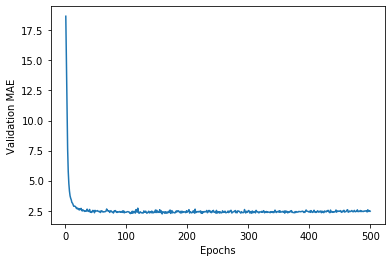

In [11]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [12]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [32]:
smooth_mae_history = smooth_curve(average_mae_history[30:])

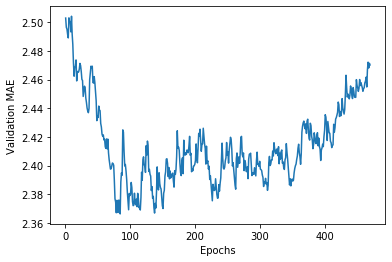

In [33]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [34]:
model = build_model()
model.fit(train_data,
         train_targets,
         epochs=110,
         batch_size=32)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/110
404/404 [==============================] - 0s 213us/step - loss: 473.7632 - mae: 19.7168
Epoch 2/110
404/404 [==============================] - 0s 65us/step - loss: 273.8636 - mae: 14.2786
Epoch 3/110
404/404 [==============================] - 0s 65us/step - loss: 130.4632 - mae: 9.1875
Epoch 4/110
404/404 [==============================] - 0s 57us/step - loss: 65.9058 - mae: 6.2577
Epoch 5/110
404/404 [==============================] - 0s 78us/step - loss: 41.9730 - mae: 4.9275
Epoch 6/110
404/404 [==============================] - 0s 70us/step - loss: 29.7134 - mae: 3.9882
Epoch 7/110
404/404 [==============================] - 0s 49us/step - loss: 23.6348 - mae: 3.4435
Epoch 8/110
404/404 [==============================] - 0s 66us/step - loss: 20.1267 - mae: 3.1241
Epoch 9/110
404/404 [==============================] - 0s 52us/step - loss: 17.8836 - mae: 2.9603
Epoch 10/110
404/404 [==============================] - 0s 63us/step - loss: 16.2370 - mae: 2.7738
Epoch 11/110


404/404 [==============================] - 0s 65us/step - loss: 5.3575 - mae: 1.6714
Epoch 85/110
404/404 [==============================] - 0s 60us/step - loss: 5.0911 - mae: 1.6587
Epoch 86/110
404/404 [==============================] - 0s 57us/step - loss: 5.0452 - mae: 1.6108
Epoch 87/110
404/404 [==============================] - 0s 68us/step - loss: 5.1954 - mae: 1.6674
Epoch 88/110
404/404 [==============================] - 0s 76us/step - loss: 5.1046 - mae: 1.6391
Epoch 89/110
404/404 [==============================] - 0s 66us/step - loss: 4.8665 - mae: 1.5932
Epoch 90/110
404/404 [==============================] - 0s 75us/step - loss: 5.0009 - mae: 1.6366
Epoch 91/110
404/404 [==============================] - 0s 76us/step - loss: 5.0305 - mae: 1.5910
Epoch 92/110
404/404 [==============================] - 0s 82us/step - loss: 5.0323 - mae: 1.6153
Epoch 93/110
404/404 [==============================] - 0s 75us/step - loss: 4.9242 - mae: 1.6046
Epoch 94/110
404/404 [===========

In [35]:
test_mae_score

2.461045980453491